# Банки-анализ оттока клиентов

Банк «Метанпромбанк» ищет аналитиков, главной задачей которых станет анализ оттока клиентов.
Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
    

**Цель** — выявить лояльных клиентов, определить криетрии их ценности, определить сегменты, в которых больше всего лояльных и ценных клиентов для банка. Дать рекомендации по продуктам, которые могут привлечь таких клиентов.


**Задачи:**
- провести исследовательский анализ данных: определить какие существуют клиенты и как они пользуются услугами банка
- проанализировать поведение клиентов и определить факторы, отвечающие за лояльность клиентов
- в зависимости от выявленных закономерностей поведения распределить клиентов по группам
- выделить  и сравнить портрет(ы) лояльных клиентов и  склонных к оттоку
- проверить статистические гипотезы
- подготовить примеры мероприятий, которые можно провести, чтобы привлечь больше лояльных клиентов.
- подготовить презентацию по итогам исследования для менеджера маркетингового отдела
- подготовить дашборд по итогам исследования




**Описание данных:**
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- Objects — количество объектов в собственности / equity — количество баллов собственности
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- Loyalty / last_activity — активный клиент,
- estimated_salary — заработная плата клиента,
- Churn — ушёл или нет.

**Ход исследования:**

*Раздел1. Изучение общей информации:*

* [Загрузка библиотек](#1-bullet)
* [Изученеие файлов с данными, получение общей информации](#2-bullet)
* [Вывод по разделу 1](#3-bullet)


*Раздел2. Предобработка данных:*

* [Приведение столбцов к нужному виду](#4-bullet)
* [Удаление неявных дубликатов](#5-bullet)
* [Кодировка категориальных переменных](#6-bullet)
* [Анализ пропусков по столбцу "баланс" (balance)](#7-bullet)
* [Устранение аномалий "возраст" ( age)¶](#8-bullet)
* [Устранение аномалий количество продуктов (products)](#9-bullet)
* [Устранение аномалий "баланс счета" ( balance)](#10-bullet)
* [Вывод по разделу 2](#11-bullet)


*Раздел3. Исследовательский анализ данных:*
* [Изучение непрерывных данных в разрезе лояльных и отточных клиентов(гистограммы)](#12-bullet)
* [Изучение дискретных данных в разрезе лояльных и отточных клиентов(столбчатые диаграммы)](#13-bullet)
* [Портреты лояльного и отточного клиента: составление и сравнение](#14-bullet)
* [Корреляционный анализ данных.](#15-bullet)
* [Вывод по разделу 3](#16-bullet)


*Раздел4.Проверка статистических гипотез:*
* [Гипотеза о различии среднего дохода между отточными и лояльными клиентами](#17-bullet)
* [Гипотеза о влиянии количества продуктов](#18-bullet)
* [Гипотеза о влиянии города ](#19-bullet)
* [Вывод по разделу 4](#20-bullet)
* [Промежуточный итог:](#21-bullet)

*Раздел5.Сегментация клиентов*
* [Приоритетные сегменты и их характеристики – размер сегмента, уровень оттока, ценность клиентов.](#22-bullet)

*Раздел6. Общий вывод*
* [Общий вывод и рекомендации для заказчика](#23-bullet)

# Дополнительные материалы
Основные пункты исследования подготовлены в виде презентации: (https://disk.yandex.ru/i/6eiQnaOJQ_--SA)



Так же, для возможности отслеживания актуального статуса клиентов был разработан дашборд: диаграмма отражает количество клиентов в зависимости от числа используемых продуктов, имеет индикаторы процента оттока и фильтр по городу.

Дашборд расположен по ссылке: (https://public.tableau.com/views/_16842511730040/Bank_dash?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

# 1. Изучение общей информации

<a id='1-bullet'></a>
## Загрузка библиотек

In [1]:
!pip install phik

     |████████████████████████████████| 679 kB 2.1 MB/s eta 0:00:01


In [2]:
# здесь сразу импортируем все библиотеки, которые потребуются в работе
import pandas as pd
import numpy as np
import math as mth

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from plotly import graph_objects as go
import plotly.express as px

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

import statistics as stat

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', 50)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', 120)

# игнорируем предупреждения
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# устанавливаем стиль графиков
#sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})   
#sns.set_context('notebook') 
#sns.set_style('ticks') 
#sns.set_style('whitegrid')

<a id='2-bullet'></a>
## Изученеие файлов с данными, получение общей информации

In [4]:
# чтение файлов с данными и сохранение в df
import pandas as pd

try:
    df = pd.read_csv('/datasets/bank_scrooge.csv')
    
except:
    df = pd.read_csv('https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F')

In [5]:
# функция для обзора данных
def df_review(df):
    display(df.head()) # вывод первых 5 строк датафрейма
    display('-'*80)
    print(df.info())# вывод информации о данных: тип данных, пропуски
    display('-'*80)
    display ('Число пропусков:',df.isna().sum())# вывод инф-ии по колонкам о пропусках
    display ('% пропусков:',round(df.isna().sum()/len(df)*100,2)) # процент пропущенных значений в столбцах
    display('-'*80)
    display(df.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))# вывод инф-ии о мин-х, средних, макс-х значениях 
    display('-'*80)
    for columns in df.columns[1:]: # посмотрим какие значения и их количества хранятся в столбцах
        display ('Значения и их количество в столбцах:',df[columns]. value_counts())
        print()
    display('-'*80)
    print('Число явных дубликатов:', df.duplicated().sum())

In [6]:
# обзор данных
df_review(df)

USERID  score       city gender   age  equity      balance  products  \
0  183012 850.00    Рыбинск      Ж 25.00       1    59,214.82         2   
1  146556 861.00    Рыбинск      Ж 37.00       5   850,594.33         3   
2  120722 892.00    Рыбинск      Ж 30.00       0          NaN         1   
3  225363 866.00  Ярославль      Ж 51.00       5 1,524,746.26         2   
4  157978 730.00  Ярославль      М 34.00       5       174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1   75,719.14      1  
1            1              0   86,621.77      0  
2            1              1  107,683.34      0  
3            0              1  174,423.53      1  
4            1              0   67,353.16      1

'--------------------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


'--------------------------------------------------------------------------------'

'Число пропусков:'

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

'% пропусков:'

USERID           0.00
score            0.00
city             0.00
gender           0.00
age              0.26
equity           0.00
balance         22.95
products         0.00
credit_card      0.00
last_activity    0.00
EST_SALARY       0.00
churn            0.00
dtype: float64

'--------------------------------------------------------------------------------'

USERID     score      age    equity        balance  products  \
count  10,000.00 10,000.00 9,974.00 10,000.00       7,705.00 10,000.00   
mean  171,814.71    848.70    42.73      2.63     827,794.31      1.87   
std    33,708.24     65.45    12.18      1.98   1,980,614.15      0.79   
min    94,561.00    642.00    18.00      0.00           0.00      0.00   
5%    119,176.40    737.00    26.00      0.00     100,104.32      1.00   
25%   142,810.25    802.00    33.00      0.00     295,554.16      1.00   
50%   172,728.00    853.00    40.00      3.00     524,272.20      2.00   
75%   201,261.75    900.00    51.00      4.00     980,705.85      2.00   
95%   223,623.05    946.00    65.00      5.00   2,116,704.78      3.00   
99%   228,019.09    978.00    73.00      7.00   4,827,443.49      4.00   
max   229,145.00  1,000.00    86.00      9.00 119,113,552.01      5.00   

       credit_card  last_activity   EST_SALARY     churn  
count    10,000.00      10,000.00    10,000.00 10,000.00  
mean          0.68           0.52   147,866.89      0.18  
std           0.47           0.50   139,388.51      0.39  
min           0.00           0.00     2,546.30      0.00  
5%            0.00           0.00    32,163.97      0.00  
25%           0.00           0.00    75,251.90      0.00  
50%           1.00           1.00   119,658.10      0.00  
75%           1.00           1.00   174,500.54      0.00  
95%           1.00           1.00   316,885.34      1.00  
99%           1.00           1.00   887,903.85      1.00  
max           1.00           1.00 1,395,064.45      1.00

'--------------------------------------------------------------------------------'

'Значения и их количество в столбцах:'

900.00    80
889.00    75
899.00    70
894.00    70
908.00    68
          ..
673.00     1
998.00     1
666.00     1
654.00     1
995.00     1
Name: score, Length: 348, dtype: int64

'Значения и их количество в столбцах:'

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

'Значения и их количество в столбцах:'

М    5005
Ж    4995
Name: gender, dtype: int64

'Значения и их количество в столбцах:'

36.00    414
37.00    402
33.00    392
35.00    388
34.00    384
        ... 
83.00      3
82.00      2
84.00      2
86.00      2
79.00      2
Name: age, Length: 68, dtype: int64

'Значения и их количество в столбцах:'

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

'Значения и их количество в столбцах:'

0.00            2
26.00           2
39.00           2
38.00           2
1,500,606.59    1
               ..
276.00          1
318,509.47      1
644,931.28      1
302,662.71      1
345,502.13      1
Name: balance, Length: 7701, dtype: int64

'Значения и их количество в столбцах:'

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

'Значения и их количество в столбцах:'

1    6804
0    3196
Name: credit_card, dtype: int64

'Значения и их количество в столбцах:'

1    5235
0    4765
Name: last_activity, dtype: int64

'Значения и их количество в столбцах:'

381,868.89    2
49,742.87     2
108,250.17    2
176,348.18    2
433,829.32    1
             ..
165,970.28    1
220,657.46    1
74,324.89     1
97,081.83     1
117,835.34    1
Name: EST_SALARY, Length: 9996, dtype: int64

'Значения и их количество в столбцах:'

0    8180
1    1820
Name: churn, dtype: int64

'--------------------------------------------------------------------------------'

Число явных дубликатов: 0


<a id='3-bullet'></a>
## **Вывод по разделу 1**

В исходном файле содержится 10000 записей о клиентах банка.

После удаления неявных дубликатов осталось ______записи.

Для каждого клиента представлены 12 характеристик.

Согласно документации к данным:
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- equity — количество баллов собственности
- Balance — баланс на счёте с/с клиента
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- last_activity — активный клиент(за последний месяц),
- estimated_salary — оценочная заработная плата/поступления клиента в месяц (результат работы модели),
- Churn — ушёл или нет(1- клиент указал, что хочет прервать отношения с банком, 0-нет)

Названия столбцов необходимо привести к нижнему регистру.
Явных дубликатов нет.

Более 95% заведений имеют выше баллы кредитного скоринга  до 946. 

Из 10000 записей 1820 записей о клиентах, которые попали в отток.
Кредитный рейтинг имеет разброс от 642.00 до 1000. 
Возрастная категория от 18 до 86 лет.
Средний и медианный возраст клиентов имеет небольшую разницу и равен 40-43 года. 
Объектов в собственности от 0 до 10, в среднем 3.
Баланс на счёте от 0 до 119,113,552.01 руб.

По ряду признаков следует проверить значения на аномальность:
1) estimated_salary- минимальное значение заработной платы клиента 2,546.30 руб. Это в 3 раза меньше МРОТ, стоит проверить данного клиента.
2) balance- макисмальное значение 119,113,552.01 руб. Для физического лица весьма внушительная сумма, учитывая то, что 99% имеет сумму баланаса на счете менее 4,827,443.49 руб. Максимальное значение явно выглядит аномалией
3) age- максимальный возраст клиента 86 лет, следует устранить аномалию, так как 99% клиентов не старше 73 лет


**Типы данных:** столбцы credit_card и churn должены иметь булевый тип, так содержит значения 0 и 1, а столбец score и age - тип integer, так как возраст и рейтинг отображаются целыми значениями. Необхождимо будет привести к правильному типу данных.

Пропущенные значения:
- возраст (age)- 26 пропущенных значений (0,26%  от всех значений),
- баланс на счете (balance) -2295 пропущенных значений (22,95%  от всех значений). Игнорировать или удалить такое большое количество пропусков нельзя. Необходимо выяснить причину их возникновения.

# 2. Предобработка данных

<a id='4-bullet'></a>
## Приведение столбцов к нужному виду

In [7]:
# приведем названия заголовков к нижнему регистру, изменим названия на более удобные:

df.columns = df.columns.str.lower()
df = df.rename(columns={'creditcard': 'credit_card', 'userid' : 'user_id'})

df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

<a id='5-bullet'></a>
## Удаление неявных дубликатов

In [8]:
# проверка на неявные дубликаты по столбцу user_id
df.duplicated(subset=['user_id'])
print(len(df))
df=df.drop_duplicates(subset=['user_id'])
print(len(df))

10000
9927


В данных было выявлено 73 дубликата по идентификатору пользователя, эти дубликаты были удалены.

<a id='6-bullet'></a>
## Кодировка категориальных переменных

Проводим кодировку категориальных данных для дальнейшего использования при расммотрении корелляций.

In [10]:
# добавляем кодирующие столбцы для города
df['yaroslavl'] = 0
df.loc[df['city'] == 'Ярославль', 'yaroslavl'] = 1
df['rybinsk'] = 0
df.loc[df['city'] == 'Рыбинск', 'rybinsk'] = 1
df['rostov'] = 0
df.loc[df['city'] == 'Ростов', 'rostov'] = 1

# добавляем кодирующие столбцы для гендерного признака
df['М'] = 0
df.loc[df['gender'] == 'М', 'М'] = 1
df['Ж'] = 0
df.loc[df['gender'] == 'Ж', 'Ж'] = 1

# добавляем кодирующие столбцы для отсутвия значений баланса
df['nobalance'] = 0
df.loc[df['balance'].isna(), 'nobalance'] = 1


df.head()

user_id  score       city gender   age  equity      balance  products  \
0   183012 850.00    Рыбинск      Ж 25.00       1    59,214.82         2   
1   146556 861.00    Рыбинск      Ж 37.00       5   850,594.33         3   
2   120722 892.00    Рыбинск      Ж 30.00       0          NaN         1   
3   225363 866.00  Ярославль      Ж 51.00       5 1,524,746.26         2   
4   157978 730.00  Ярославль      М 34.00       5       174.00         1   

   credit_card  last_activity  est_salary  churn  yaroslavl  rybinsk  rostov  \
0            0              1   75,719.14      1          0        1       0   
1            1              0   86,621.77      0          0        1       0   
2            1              1  107,683.34      0          0        1       0   
3            0              1  174,423.53      1          1        0       0   
4            1              0   67,353.16      1          1        0       0   

   М  Ж  nobalance  
0  0  1          0  
1  0  1          0  
2  0  1          1  
3  0  1          0  
4  1  0          0

<a id='7-bullet'></a>
## Анализ пропусков по столбцу "баланс" (balance)

In [11]:
#создадим отдельный датафрейм с пропуcками в столбце баланс, 
# для дальнейшего исследования
void=df.query('balance.isna()')
#void.head()

In [12]:
#смотрим относительное распредление пропущенных значений по городу,
#количеству продуктов, лояльности, полу, оттоку,баллам собственности

for column in ['products','credit_card', 'churn','equity']:
    print(column)
    print(round(df.query('balance.isna()')[column].value_counts(normalize=True),2))
    print()   

products
1   0.85
2   0.14
3   0.01
0   0.00
Name: products, dtype: float64

credit_card
1   0.82
0   0.18
Name: credit_card, dtype: float64

churn
0   0.99
1   0.01
Name: churn, dtype: float64

equity
0   0.95
1   0.05
3   0.00
Name: equity, dtype: float64



85% клиентов с пропус ками в балансе  имеют 1 продукт из них 82%- кредитные карты, процент оттока составляет 99% и при этом у 95% имущественный скоринг равен 0

Рассмотрим формы распределения в разрезе пропусков данных баланса.

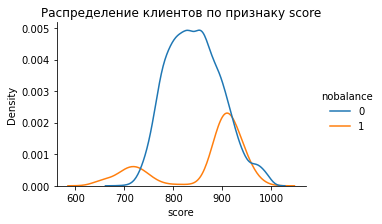

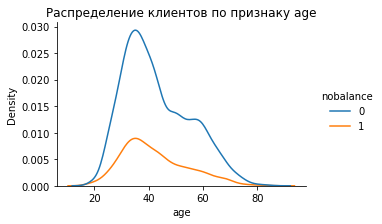

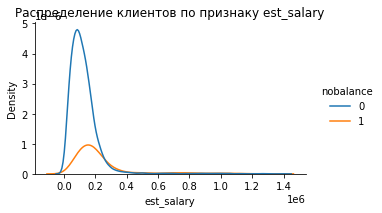

In [15]:
for column in ['score','age', 'est_salary']:
    sns.displot(data=df, x=df[column], hue="nobalance", kind="kde",height= 3 , aspect= 1.5 )
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

Из графиков выше видно, что распределение данных, где есть пропуски данных по столбцу баланс и строк, где данные по балансу присутсвуют отличаются друг от друга по следующим параметрам: score и age. Это подтверждает предположение, что пропуски в данных баланса не случайны. Отсюда можно сделать вывод, что наши пропуски относятся к кактегории "неслучайных пропусков" (missing not at random, MNAR) т.е. вероятность появления пропуска зависит, в том числе, от фактора, о котором мы ничего не знаем.  Сильной  взаимосвязи с имеющимися данными не наблюдается, а значит, их нельзя отбрасывать или заполнять одним значением без особых оснований, т.к. это приведёт к заметным искажениям. 

Можно сделать предположение, что пропущенные значения - нулевые значения балансов, так как 99 % таких клиентов приходится на лоядльных и у 82% есть кредитная карта. Предположительно, кроме кредитки у дданных клиентов больше нет активов.

У клиентов со скором выше 850 без кредитных карт  неооточных и без собственности может быть нулевой баланс , так как у них нет дебетового счета в банке, то есть их продукт не связан с открытием счета, в этой связи посмотрим сколько нулевых балансов есть в датасете.

In [16]:
df.query('balance==0').shape[0]

2

Очень небольшое количество нулевых балансов для такого большого количества записей, что подтверждает мысль, что пропуски, это нулевые значения, которые из-за какого-то технического сбоя остались незаполненными.

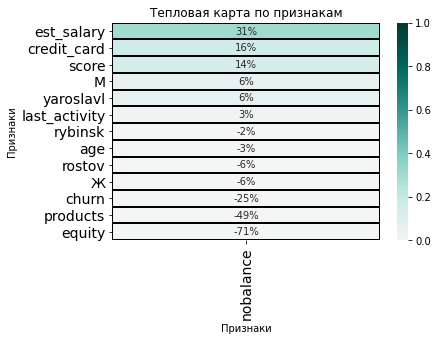

In [18]:
# посмотрим на связь пропусков в балансе и остальными параметрами
sns.heatmap(df.drop(['user_id', 'balance'], axis=1).corr().loc[:,['nobalance']].drop('nobalance').sort_values('nobalance', ascending=False), annot = True, fmt='.0%', vmin=0, vmax=1, center= 0, cmap= 'BrBG', linewidths=1, linecolor='black')
plt.title('Тепловая карта по признакам')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=360)
plt.ylabel('Признаки')
plt.xlabel('Признаки');

Из полученных данных видно, что наблюдается прямая, средне-слабая(по шкале Чеддока) связь меджу данными  пропуска баланса и ежемесячным доходом (0,31) и слабая связь между данными баланса и наличием кредитной карты (0,16), а также кредитным рейтингом(0,14).
Также наблюдается высокая обратная связь между пропусками баланса и имущественным рейтингом (-71%), умеренная обратная связь между пропусками баланса и количеством продуктов(-49%).

Как и следовало ожидать, самая сильная связь по модулю в пропусках баланса именно по имущественному скорингу.

In [19]:
#Посмотрим сколько нулевых значений имущественного скоринга
df.query('equity==0').shape[0]

2554

Так как количество клиентов с нулевыми имущественныыми  балансами даже чуть больше, чем количество пропусков по бланасу это позволяет подтвердить предположение, что пропуски- это нулевые значения баланса.
Можно  даже выделить отдельный сегмент клиентов: с отсутсвием баланса, а значит кредитки или дебетового счета, с нулевым имущественным балансом и при этом лояльных.
Заменяем пропуски в балансе на 0

In [20]:
df=df.fillna(0)

<a id='8-bullet'></a>
## Устранение аномалий "возраст" ( age)

При первичном знакомстве с данными были выявлены подозрительные значения, похожие на аномалии в столбцах с возрастом, балансом на счёте и ЗП. Для этого построим диаграмму размаха и определеим выбросы.

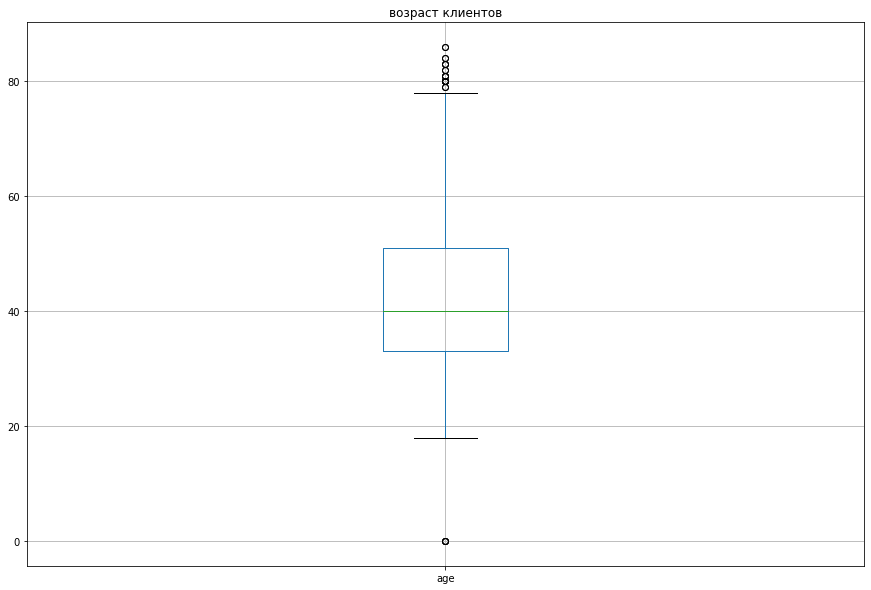

In [21]:
#строим диаграмму размаха и определим выбросы в столбце с возрастом
df['age'].plot(kind='box', grid=True, figsize=(15,10), title='возраст клиентов');

In [22]:
df['age'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]),2

(count   9,927.00
 mean       42.71
 std        12.20
 min         0.00
 5%         26.00
 25%        33.00
 50%        40.00
 75%        51.00
 95%        65.00
 99%        73.00
 max        86.00
 Name: age, dtype: float64,
 2)

Минимальный возраст- 0, явный сбой в заполнении данных, который , к сожалению не заполнить, придется удалить.
Средний возраст клиентов составляет 40 лет. медианное значение, не подверженное выбросам, составляет 42.73 года. а вот максимальное 86 лет. Всего 1 процент клиентов старше 73 лет. Так как возраст до 86 лет- вполне реалистичен, то "выбросы" оставляем, удаляем нулевые значения.

In [23]:
#устраним записи с возрастом клиентов старше 78 лет
df=(df.query('age!=0')).reset_index(drop=True)
print(len(df))

9923


<a id='9-bullet'></a>
## Устранение аномалий количество продуктов (products)

При знакомстве с данными было видно, что минимальное значение по количеству продуктов- ноль, так как такого быть не может, а заполнить точно мы не сможем уэту информацию- удалим этогих клиентов.

In [29]:
# удалим строки с количеством продуктов =0 
df=(df.query('products != 0')).reset_index(drop=True)
print(len(df))

9922


<a id='10-bullet'></a>
## Устранение аномалий "баланс счета" ( balance)

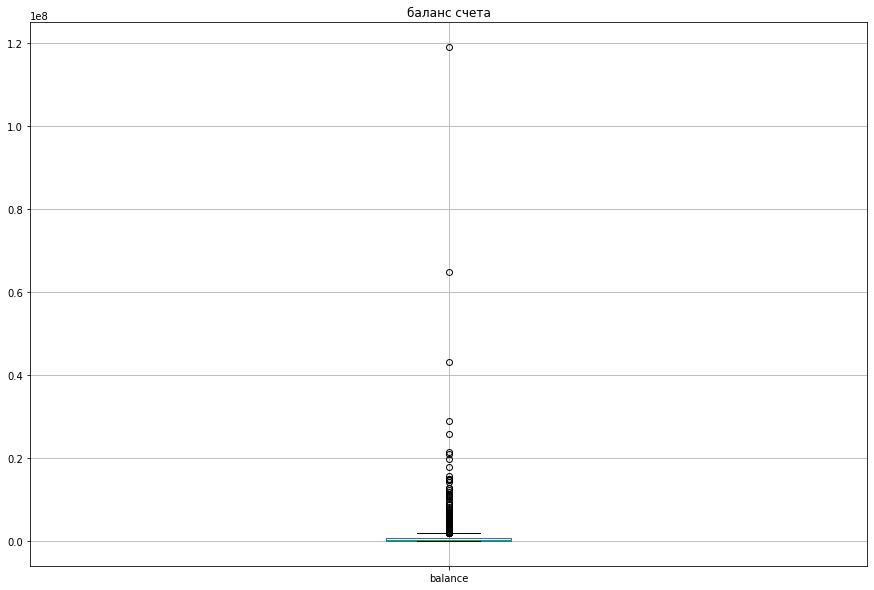

In [30]:
#строим диаграмму размаха и определим выбросы в столбце с возрастом
df['balance'].plot(kind='box', grid=True, figsize=(15,10), title='баланс счета');

На графике видно, что выше 1700-1800 тыс. руб.- аномалии, приблизим график, чтобы рассмотреть подробнее. 

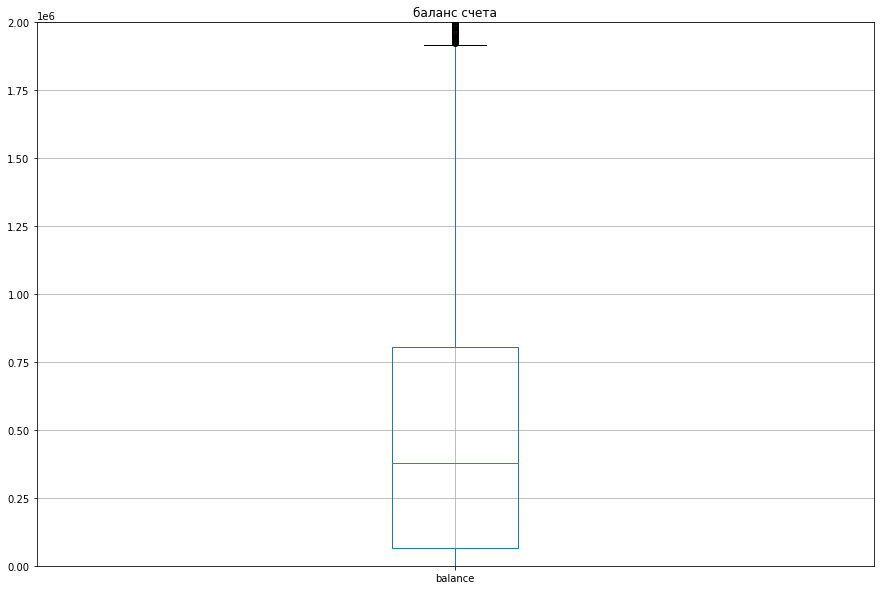

In [31]:
df['balance'].plot(kind='box', grid=True, figsize=(15,10),ylim=(0, 2000000), title='баланс счета');

In [32]:
df['balance'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]),2

(count         9,922.00
 mean        639,676.04
 std       1,778,024.60
 min               0.00
 5%                0.00
 25%          63,741.43
 50%         376,715.58
 75%         805,331.39
 95%       1,847,426.28
 99%       4,305,863.64
 max     119,113,552.01
 Name: balance, dtype: float64,
 2)

Среднее значение-383 тыс. руб. медианное значение 640 тыс. руб. минимальное значение-0, максимальное -119 млн.

In [33]:
# посмотрим к какой категории людей относятся те, у которых баланс  выше 1800000
vip_balance=df.query('balance>1800000')
for column in ['city','products','credit_card','last_activity', 'churn','equity','gender']:
    print(column)
    print(round(vip_balance[column].value_counts(normalize=True),2))
    print()

city
Ярославль   0.70
Рыбинск     0.22
Ростов      0.08
Name: city, dtype: float64

products
2   0.57
4   0.18
3   0.17
1   0.08
Name: products, dtype: float64

credit_card
0   0.55
1   0.45
Name: credit_card, dtype: float64

last_activity
1   0.52
0   0.48
Name: last_activity, dtype: float64

churn
0   0.51
1   0.49
Name: churn, dtype: float64

equity
5   0.45
4   0.32
3   0.14
2   0.04
6   0.03
7   0.01
1   0.01
8   0.01
9   0.00
Name: equity, dtype: float64

gender
М   0.61
Ж   0.39
Name: gender, dtype: float64



In [34]:
print('Количество клиентов с балансом 1800 000:', len(df.query('balance > 1800000')))
print('Процент от общего числа:',round(len(df.query('balance > 1800000'))/len(df)*100,2))

Количество клиентов с балансом 1800 000: 519
Процент от общего числа: 5.23


Исходя из данных выше вип клиенты по размеру баланса свыше 1800 000 руб. почти 50-50: делятся на отточных и неотточных клиентов и составляют 5% от всех клиентов,с одной стороны не много, но стоит проверить какой процент средств на счетах банков отбросится с этими клиентами.

In [35]:
print('Процент от общего баланса:',round((df.query('balance > 1800000')['balance'].sum()/df['balance'].sum()*100),2))

Процент от общего баланса: 32.76


Так как на балансе этиъ 5% клиентов с балансом более 1 800 000 приходится почти 33% от суммарного баланса всех клиентов отбрасывать для анализа таких клиентов нельзя

<a id='11-bullet'></a>
##  Вывод по разделу 2

В данном разделе было проделано следующее:
- названия столбцов приведены к нижнему регистру
- проведена проверка на неявные дубликаты по id- устранено 73 неявных дубликата
- устранены выбросы по столбцу возраст - клиенты с 0возрастом удалены 
- устранена аномалия в количестве продуктов, значение, равное 0
- проведен анализ возникновения пропусков в столбце баланс,можно сделать предположение, что пропущенные значения ни что иное, как нулевые значения балансов


# Исследовательский анализ данных

<a id='12-bullet'></a>
## Изучение непрерывных данных в разрезе лояльных и отточных клиентов(гистограммы)

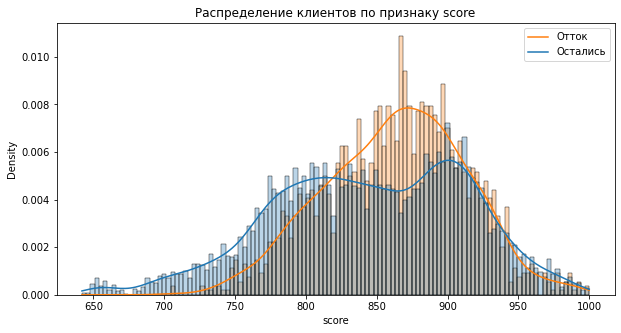

In [36]:
# строим гистограмму по кредитному рейтингу
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='score', hue='churn', bins=120, kde=True, alpha  = 0.3, stat="density", common_norm=False)
plt.title(f'Распределение клиентов по признаку score')
plt.legend(['Отток', 'Остались'])
plt.show()
    

По параметру score - лояльные клиенты с кредитным рейтингом до 815 и от 938 до 1000, отточных клиентов с кредитным рейтингом от 815 до 938 больше, чем отточных в этом диапазоне

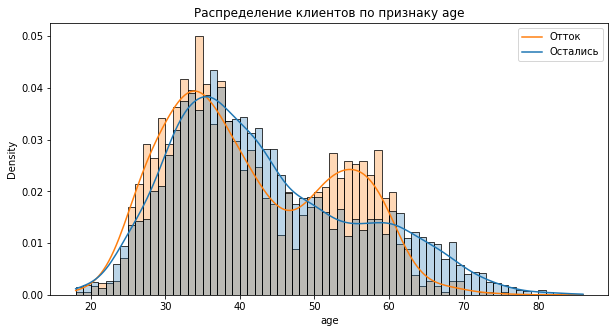

In [37]:
# строим гистограмму по возрасту
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='churn', bins=68, kde=True, alpha  = 0.3, stat="density", common_norm=False)
plt.title(f'Распределение клиентов по признаку age')
plt.legend(['Отток', 'Остались'])
plt.show()
    

По параметру  age- клиенты возрастом от 18 до 21,от  35 лет до 49  и  с 61 до 86 лет - лояльные, отточные клиенты от 22 до 34 лет и от 49 до 60 лет

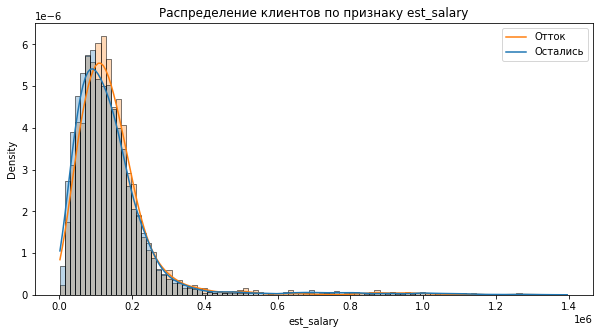

In [38]:
# строим гистограмму по доходу
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='est_salary', hue='churn', bins=100, kde=True, alpha  = 0.3, stat="density", common_norm=False)
plt.title(f'Распределение клиентов по признаку est_salary')
plt.legend(['Отток', 'Остались'])
plt.show()

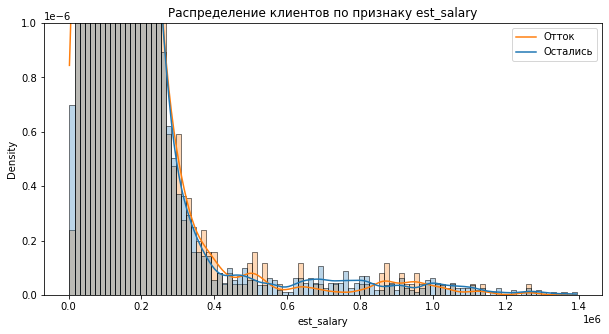

In [39]:
# рассмотрим график доходов ближе
plt.figure(figsize=(10, 5))
z=sns.histplot(data=df, x='est_salary',hue='churn', bins=100, kde=True, alpha  = 0.3, stat="density", common_norm=False)
z.set_ylim(0, 0.000001)
plt.title(f'Распределение клиентов по признаку est_salary')
plt.legend(['Отток', 'Остались'])
plt.show()

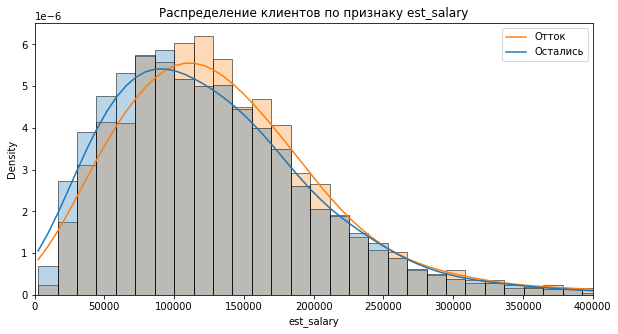

In [40]:
# рассмотрим график доходов ближе
plt.figure(figsize=(10, 5))
z=sns.histplot(data=df, x='est_salary',hue='churn', bins=100, kde=True, alpha  = 0.3, stat="density", common_norm=False)
z.set_xlim(0, 400000)
plt.title(f'Распределение клиентов по признаку est_salary')
plt.legend(['Отток', 'Остались'])
plt.show()

По параметру  est_salary- клиенты с доходом от 0 до 85000 -лояльные, отточные с доходом более 85000 и далее

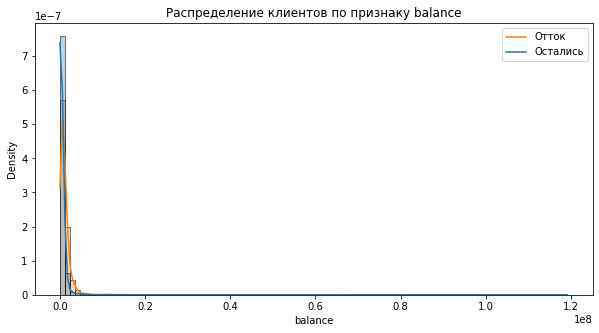

In [41]:
# строим гистограмму по балансу
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='balance', hue='churn', bins=100, kde=True, alpha  = 0.3, stat="density", common_norm=False)
plt.title(f'Распределение клиентов по признаку balance')
plt.legend(['Отток', 'Остались'])
plt.show()

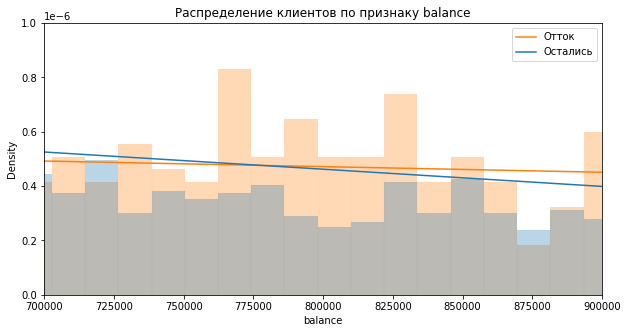

In [42]:
# рассмотрим график ближе
plt.figure(figsize=(10, 5))
z=sns.histplot(data=df, x='balance',hue='churn', bins=10000, kde=True, alpha  = 0.3, stat="density", common_norm=False)
z.set_xlim(700000, 900000)
z.set_ylim(0,0.000001)
plt.title(f'Распределение клиентов по признаку balance')
plt.legend(['Отток', 'Остались'])
plt.show()

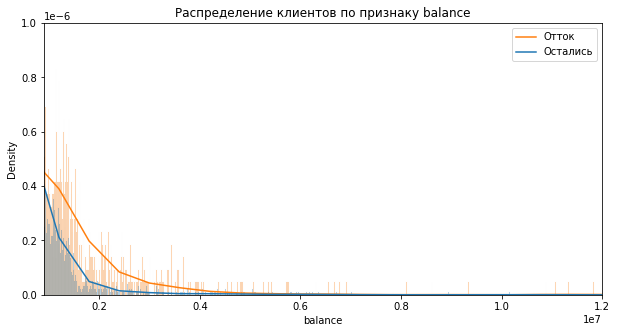

In [43]:
# рассмотрим график ближе
plt.figure(figsize=(10, 5))
z=sns.histplot(data=df, x='balance',hue='churn', bins=10000, kde=True, alpha  = 0.3, stat="density", common_norm=False)
z.set_xlim(900000, 12000000)
z.set_ylim(0,0.000001)
plt.title(f'Распределение клиентов по признаку balance')
plt.legend(['Отток', 'Остались'])
plt.show()

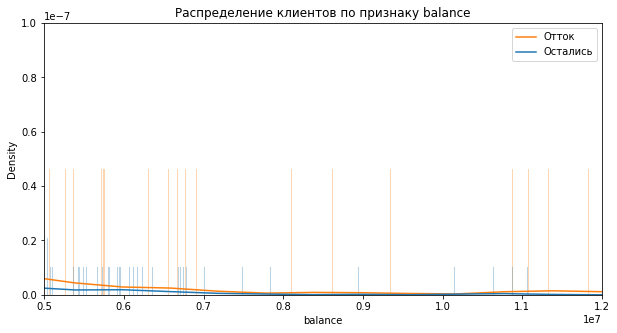

In [44]:
# рассмотрим график ближе
plt.figure(figsize=(10, 5))
z=sns.histplot(data=df, x='balance',hue='churn', bins=10000, kde=True, alpha  = 0.3, stat="density", common_norm=False)
z.set_xlim(5000000, 12000000)
z.set_ylim(0,0.0000001)
plt.title(f'Распределение клиентов по признаку balance')
plt.legend(['Отток', 'Остались'])
plt.show()

по параметру balance -клиенты с балансом  от 0 до 775 000 руб. чаще остаются, чем отточные клиенты с балансом более 775 000 руб.

Как видно из графиков распределение для  отточных и неотточных клиентов выглядит следующим образом:

1)По параметру score - лояльные клиенты с кредитным рейтингом до 815 и от 938 до 1000, отточных клиентов с кредитным рейтингом от 815 до 938 больше, чем отточных в этом диапазоне

2) по параметру balance -по параметру balance -клиенты с балансом  от 0 до 775 000 руб. чаще остаются, чем отточные клиенты с балансом более 775 000 руб.

3)параметру  age- клиенты возрастом от 18 до 21,от  35 лет до 49  и  с 61 до 86 лет - лояльные, отточные клиенты от 22 до 34 лет и от 49 до 60 лет

4) По параметру  est_salary- клиенты с доходом от 0 до 85000 -лояльные, отточные с доходом более 85000 и более

<a id='13-bullet'></a>
## Изучение дискретных данных в разрезе лояльных и отточных клиентов(столбчатые диаграммы)

In [45]:
# теперь посмотрим распределение процент отточных и лояльных клиентов по категориальным показателям
for column in ['gender', 'equity','products', 
        'credit_card', 'last_activity']:
    param=df.groupby([column,'churn'])['user_id'].count().reset_index()
    all_gender=df.groupby(column)['user_id'].count()
    param=param.merge(all_gender,on=column)
    param.columns = [column, 'churn','column_churn','count']
    param['share']=(param['column_churn']/param['count']* 100).round(2)
    display(param)
    fig = px.bar(param,
             x= column,
             y='share',
             text='share',
             color='churn',color_discrete_sequence=["green", "brown"],
                )
    fig.update_layout(title= f'% отточных и лояльных клиентов по {column}',
                  xaxis_title=column,
                  yaxis_title='share')
    fig.show()

gender  churn  column_churn  count  share
0      Ж      0          4317   4952  87.18
1      Ж      1           635   4952  12.82
2      М      0          3787   4970  76.20
3      М      1          1183   4970  23.80

equity  churn  column_churn  count  share
0        0      0          2464   2554  96.48
1        0      1            90   2554   3.52
2        1      0           678    771  87.94
3        1      1            93    771  12.06
4        2      0           880   1046  84.13
5        2      1           166   1046  15.87
6        3      0          1210   1531  79.03
7        3      1           321   1531  20.97
8        4      0          1377   1841  74.80
9        4      1           464   1841  25.20
10       5      0          1333   1909  69.83
11       5      1           576   1909  30.17
12       6      0           103    161  63.98
13       6      1            58    161  36.02
14       7      0            42     79  53.16
15       7      1            37     79  46.84
16       8      0            11     17  64.71
17       8      1             6     17  35.29
18       9      0             6     13  46.15
19       9      1             7     13  53.85

products  churn  column_churn  count  share
0         1      0          3071   3306  92.89
1         1      1           235   3306   7.11
2         2      0          4117   5095  80.80
3         2      1           978   5095  19.20
4         3      0           731   1028  71.11
5         3      1           297   1028  28.89
6         4      0           174    474  36.71
7         4      1           300    474  63.29
8         5      0            11     19  57.89
9         5      1             8     19  42.11

credit_card  churn  column_churn  count  share
0            0      0          2359   3174  74.32
1            0      1           815   3174  25.68
2            1      0          5745   6748  85.14
3            1      1          1003   6748  14.86

last_activity  churn  column_churn  count  share
0              0      0          4188   4729  88.56
1              0      1           541   4729  11.44
2              1      0          3916   5193  75.41
3              1      1          1277   5193  24.59

Распределение отточных клиентов по категориальным параметрам выглядит следующим образом:
1) по параметру gender- доля лояльных женщин 87,18%, отточных женщин 12,82%, доля отточных мужчин 23,08- почти в два раза больше, чем женщин.

2)по параметру equity- самый большой процент отточных клиентов с имущественным рейтингом 7(46,84%)и 9 (53,85%), самые лояльные клиенты с имущественным рейтингом 0(96.48%)

3)по параметру products-самый большой процент отточных клиентов с 4 продуктами(63,29), самый большой процент лояльный клиентов с 1 продуктом (92.89%)

4) по параметру credit_card- лояльность людей с кредитной картой выше, чем у людей без кредитной карты почти на 10%, при этом лояльность людей с кредитной картой составляет 85,14%

5) по параметру last_activity- лояльность людей, которые не были активны в последний месяц больше, чем лояльность активных клиентов 88,56% и 75,41% соответсвенно, вероятно это связано с закрытием карт в личных кабинетах или попоплнением балансов кредиток.

<a id='14-bullet'></a>
## Портреты лояльного и отточного клиента: составление и сравнение

Посмотрм на описание параметров в разрезе отточных и неотточных клиентов

In [46]:
#отточные клиенты
df.query('churn == 1').drop(['user_id'], axis=1).describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

score      age   equity       balance  products  credit_card  \
count 1,818.00 1,818.00 1,818.00      1,818.00  1,818.00     1,818.00   
mean    863.36    41.43     3.76  1,126,970.04      2.38         0.55   
std      49.58    11.14     1.59  2,029,797.36      0.92         0.50   
min     706.00    18.00     0.00          0.00      1.00         0.00   
5%      779.85    26.00     1.00    123,046.67      1.00         0.00   
25%     828.00    32.00     3.00    382,038.08      2.00         0.00   
50%     866.00    39.00     4.00    775,399.47      2.00         1.00   
75%     898.00    52.00     5.00  1,347,250.18      3.00         1.00   
95%     938.00    60.00     6.00  2,980,906.85      4.00         1.00   
99%     977.00    65.00     7.00  6,218,061.37      4.00         1.00   
max   1,000.00    75.00     9.00 64,866,210.15      5.00         1.00   

       last_activity   est_salary    churn  yaroslavl  rybinsk   rostov  \
count       1,818.00     1,818.00 1,818.00   1,818.00 1,818.00 1,818.00   
mean            0.70   148,357.48     1.00       0.61     0.24     0.15   
std             0.46   122,931.98     0.00       0.49     0.43     0.35   
min             0.00    10,880.27     1.00       0.00     0.00     0.00   
5%              0.00    38,502.60     1.00       0.00     0.00     0.00   
25%             0.00    83,285.66     1.00       0.00     0.00     0.00   
50%             1.00   125,408.88     1.00       1.00     0.00     0.00   
75%             1.00   176,017.84     1.00       1.00     0.00     0.00   
95%             1.00   304,056.79     1.00       1.00     1.00     1.00   
99%             1.00   857,278.44     1.00       1.00     1.00     1.00   
max             1.00 1,263,028.49     1.00       1.00     1.00     1.00   

             М        Ж  nobalance  
count 1,818.00 1,818.00   1,818.00  
mean      0.65     0.35       0.01  
std       0.48     0.48       0.08  
min       0.00     0.00       0.00  
5%        0.00     0.00       0.00  
25%       0.00     0.00       0.00  
50%       1.00     0.00       0.00  
75%       1.00     1.00       0.00  
95%       1.00     1.00       0.00  
99%       1.00     1.00       0.00  
max       1.00     1.00       1.00

У отточных клиентов:
- кредитный рейтинг в среднем 863-866 баллов,
- средний возраст 39-41 год
- количество баллов собственности- в среднем 4
- баланс на счёте с/с клиента- в среднем 775,399.47 руб.
- количество продуктов, которыми пользуется клиент- 2
- оценочная заработная плата/поступления клиента в месяц (результат работы модели)-125,408.88 руб.
- отточными клиентами в 35 % процентах становятся женщины, а в 65% -мужчины
- отточные клиенты в 55% случаев являются держателями кредитных карт
- отточные клиенты в 70% случаев являются активными пользователями
- отточные клиенты чаще всего встречаются в Ярославле 61%, в Рыбинске 24%, в Ростове 15%

In [47]:
#лояльные клиенты
df.query('churn == 0').drop(['user_id'], axis=1).describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

score      age   equity        balance  products  credit_card  \
count 8,104.00 8,104.00 8,104.00       8,104.00  8,104.00     8,104.00   
mean    845.44    43.02     2.38     530,359.59      1.76         0.71   
std      68.01    12.37     1.97   1,697,514.66      0.71         0.45   
min     642.00    18.00     0.00           0.00      1.00         0.00   
5%      729.00    26.00     0.00           0.00      1.00         0.00   
25%     796.00    34.00     0.00           0.00      1.00         0.00   
50%     848.00    40.00     3.00     321,692.92      2.00         1.00   
75%     900.00    51.00     4.00     665,669.85      2.00         1.00   
95%     947.00    66.00     5.00   1,448,353.69      3.00         1.00   
99%     979.00    73.00     6.00   3,780,547.47      4.00         1.00   
max   1,000.00    86.00     9.00 119,113,552.01      5.00         1.00   

       last_activity   est_salary    churn  yaroslavl  rybinsk   rostov  \
count       8,104.00     8,104.00 8,104.00   8,104.00 8,104.00 8,104.00   
mean            0.48   147,795.99     0.00       0.58     0.27     0.14   
std             0.50   142,799.30     0.00       0.49     0.45     0.35   
min             0.00     2,546.30     0.00       0.00     0.00     0.00   
5%              0.00    30,972.01     0.00       0.00     0.00     0.00   
25%             0.00    73,487.07     0.00       0.00     0.00     0.00   
50%             0.00   118,248.51     0.00       1.00     0.00     0.00   
75%             1.00   174,106.04     0.00       1.00     1.00     0.00   
95%             1.00   320,951.55     0.00       1.00     1.00     1.00   
99%             1.00   905,348.22     0.00       1.00     1.00     1.00   
max             1.00 1,395,064.45     0.00       1.00     1.00     1.00   

             М        Ж  nobalance  
count 8,104.00 8,104.00   8,104.00  
mean      0.47     0.53       0.28  
std       0.50     0.50       0.45  
min       0.00     0.00       0.00  
5%        0.00     0.00       0.00  
25%       0.00     0.00       0.00  
50%       0.00     1.00       0.00  
75%       1.00     1.00       1.00  
95%       1.00     1.00       1.00  
99%       1.00     1.00       1.00  
max       1.00     1.00       1.00

 У лояльных клиентов:
- кредитный рейтинг в среднем 848  баллов,
- средний возраст 40-43 год
- количество баллов собственности- в среднем 2,4-3
- баланс на счёте с/с клиента- в среднем 321,692.92-530,359.59 руб.
- количество продуктов, которыми пользуется клиент- 2
- оценочная заработная плата/поступления клиента в месяц (результат работы модели)-118,248.51 руб.
- лояльными клиентами в 53 % процентах становятся женщины, а в 47% -мужчины
- лояльные клиенты в 71% случаев являются держателями кредитных карт
- лояльные  клиенты в 48% случаев являются активными пользователями
- лояльные клиенты чаще всего встречаются в Ярославле 58%, в Рыбинске 27%, в Ростове 14%

In [48]:
compare=df.drop(['user_id',"nobalance"], axis=1).groupby('churn').mean().T
compare['share']=round((compare[1]-compare[0])/compare[0]*100,2)
compare['mode']=compare['share'].abs()
compare=compare.sort_values(by = 'mode', ascending=False)
compare

churn                  0            1  share   mode
balance       530,359.59 1,126,970.04 112.49 112.49
equity              2.38         3.76  58.07  58.07
last_activity       0.48         0.70  45.36  45.36
М                   0.47         0.65  39.25  39.25
products            1.76         2.38  35.21  35.21
Ж                   0.53         0.35 -34.43  34.43
credit_card         0.71         0.55 -22.18  22.18
rybinsk             0.27         0.24 -12.30  12.30
yaroslavl           0.58         0.61   5.11   5.11
age                43.02        41.43  -3.69   3.69
rostov              0.14         0.15   2.63   2.63
score             845.44       863.36   2.12   2.12
est_salary    147,795.99   148,357.48   0.38   0.38

Из проведенного выше анализа видно, что:

- собственные средства клиентов (баланс ) у отточных клиентов на 112.49 % выше, чем у лояльных
- количество баллов собственности у отточных клиентов на 58.07% выше, чем у лояльных
- отточные клиенты на 45.36% более активные пользователи, чем лояльные
- отточные клиенты на 39.25% чаще бывают мужчинами, чем лояльные
- количество продуктов, которыми пользуются  отточные клиенты на 35.21 % выше, чем у лояльных
- лояльные клиенты  на 34.43 % чаще бывают женщинами
- средний возраст клиентов у лояльных на 3.69% выше, чем у отточных
- отточные клиенты на 22.18 % реже являются держителями кредитных карт, чем лояльные
- оценочная заработная плата у лояльных и отточных клиентов практически одинаковая
- отточных клиентов на 2.63% больше в Ростове и на 5.11% больше в Ярославле, чем лояльных, а в Рыбинске лояльных клиентов на 12,30% больше, чем отточных
- кредитный рейтинг у отточных клиентов на 2,12% выше, чем у лояльных
    
Из таблицы выше видно, что  больше всего на отток влияет : собственные средства клиентов(баланс),количество баллов собственности,активность, принадлежность к мужскому полу,количество продуктов

In [49]:
# посмторим на аналогичную таблицу в фокусе лояльных клиентов по сравнению с отточными
comp=df.drop(['user_id',"nobalance"], axis=1).groupby('churn').mean().T
comp['share']=round((comp[0]-compare[1])/compare[1]*100,2)
comp['mode']=comp['share'].abs()
comp=comp.sort_values(by = 'mode', ascending=False)
comp

churn                  0            1  share  mode
balance       530,359.59 1,126,970.04 -52.94 52.94
Ж                   0.53         0.35  52.51 52.51
equity              2.38         3.76 -36.74 36.74
last_activity       0.48         0.70 -31.21 31.21
credit_card         0.71         0.55  28.49 28.49
М                   0.47         0.65 -28.19 28.19
products            1.76         2.38 -26.04 26.04
rybinsk             0.27         0.24  14.02 14.02
yaroslavl           0.58         0.61  -4.86  4.86
age                43.02        41.43   3.83  3.83
rostov              0.14         0.15  -2.56  2.56
score             845.44       863.36  -2.08  2.08
est_salary    147,795.99   148,357.48  -0.38  0.38

Наибольшее процентное различие в показателях лояльных клиентов по отношению к отточным являются : 
- собственные средства клиентов(баланс)- у лояльных клиентов значение баланса на 52.94% ниже, чем у отточных клиентов
- принадлежность к женскому полу(на 52,51% женщин лояльных больше, чем отточных), 
- количество баллов собственности - у лояльных клиентов значение  на 36.74 % ниже, чем у отточных клиентов
- лояльные клиенты на 31.21% менее активные, чем отточные
- наличие кредитной карты- у лояльных клиентов значение  на 28.49% выше, чем у отточных клиентов
- принадлежность к мужскому полу- у лояльных клиентов значение  на 28,19% ниже, чем у отточных клиентов
- количество продуктов- у лояльных клиентов значение  на 26,04% ниже, чем у отточных клиентов
- проживание в городе Рыбинск- у лояльных клиентов значение  на 14,02% выше, чем у отточных клиентов

<a id='15-bullet'></a>
## Корелляционный анализ

На данном этапе необходимо проверить наличие связи между параметрами и отточностью клиентов, сперва сосавим матрицу корелляций Пирсона для проверки линейных зависимостей:

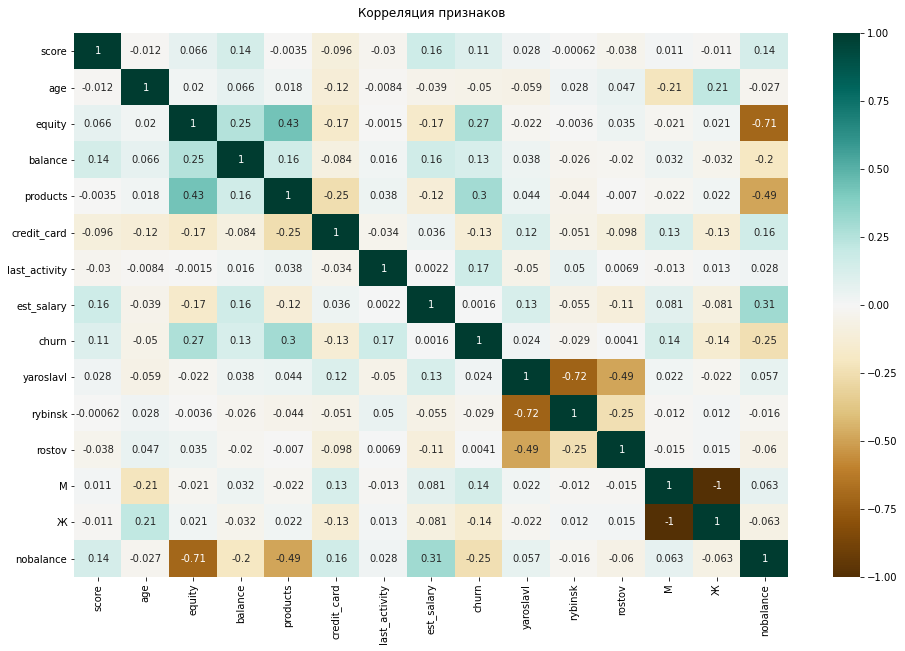

In [50]:
# строим корреляционную матрицу
data_cor = df.drop(['user_id','gender'], axis=1)
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(data_cor.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 

heatmap.set_title('Корреляция признаков', fontdict={'fontsize':12}, pad=16);

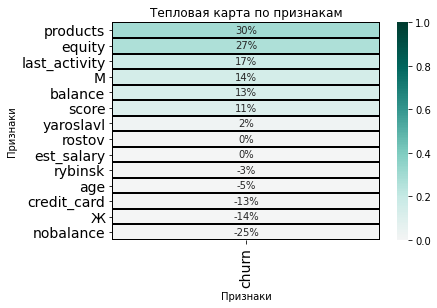

<Figure size 1152x720 with 0 Axes>

In [51]:
sns.heatmap(data_cor.corr().loc[:,['churn']].drop('churn').sort_values('churn', ascending=False), annot = True, fmt='.0%', vmin=0, vmax=1, center= 0, cmap= 'BrBG', linewidths=1, linecolor='black')
plt.title('Тепловая карта по признакам')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=360)
plt.ylabel('Признаки')
plt.xlabel('Признаки')
plt.figure(figsize=(16, 10));

Как видно из графика,  согласно  шкале Чеддока, наблюдается прямая линейная  слабая  связь(0-0,3) показателя оттока  с  количеством продуктов(30%), имущественной оценкой (27%), активностью (17%), принадлежностью к мужскому полу (14%), балансом(13%), кредитным рейтингом (11%), минимальная связь с городами Ростов и Ярославль(0% и 2%).
Отсутсвует линейная зависимость от наличия уровня дохода. 
Обратная линейная связь наблюдается с показателями город Рыбинск (-3%), возраст (-5%), наличие кредитной карты (-13%), принадлежность к женскому полу (-14%), отсутствие баланса (25%)

Так как сильных линейных связей показателя оттока не обнаружено построим матрицу phic, чтобы проверить наличие нелинейных зависимостей.

In [52]:
cols_to_keep = ['churn','score', 'city', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary',
       'yaroslavl', 'rybinsk', 'rostov', 'М', 'Ж','nobalance']     
df_phic = df[cols_to_keep]
phik_overview = df_phic.phik_matrix()
phik_overview.round(2).head(1).T.sort_values('churn', ascending=False)

interval columns not set, guessing: ['churn', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'yaroslavl', 'rybinsk', 'rostov', 'М', 'Ж', 'nobalance']


churn
churn           1.00
nobalance       0.38
equity          0.35
products        0.26
last_activity   0.26
score           0.23
М               0.22
Ж               0.22
credit_card     0.20
age             0.18
est_salary      0.05
rybinsk         0.04
balance         0.03
yaroslavl       0.03
city            0.02
rostov          0.00

Из полученных данных видно, что наиболее сильная связь у оттока с отсутствием баланса (38%),имущественной оценкой (35%),активностью (26%), количеством продуктов  и кредитным рейтингом (23%), принадлежностью к полу (22%), наличие кредитной карты (20%), возраст (18%)

<a id='16-bullet'></a>
## Вывод по разделу 3

По итогам проведенного исселдовательского анализа было выявлено следующее:

Распределение для отточных и неотточных клиентов непрерывных данных выглядит следующим образом:

1)По параметру score - лояльные клиенты с кредитным рейтингом до 815 и от 938 до 1000, отточных клиентов с кредитным рейтингом от 815 до 938 больше, чем отточных в этом диапазоне

2) по параметру balance -по параметру balance -клиенты с балансом  от 0 до 775 000 руб. чаще остаются, чем отточные клиенты с балансом более 775 000 руб.

3)параметру  age- клиенты возрастом от 18 до 21,от  35 лет до 49  и  с 61 до 86 лет - лояльные, отточные клиенты от 22 до 34 лет и от 49 до 60 лет

4) По параметру  est_salary- клиенты с доходом от 0 до 85000 -лояльные, отточные с доходом более 85000 и более


Распределение отточных клиентов по категориальным параметрам выглядит следующим образом:
1) по параметру gender- доля лояльных женщин 87,18%, отточных женщин 12,82%, доля отточных мужчин 23,08- почти в два раза больше, чем женщин.

2)по параметру equity- самый большой процент отточных клиентов с имущественным рейтингом 7(46,84%)и 9 (53,85%), самые лояльные клиенты с имущественным рейтингом 0(96.48%)

3)по параметру products-самый большой процент отточных клиентов с 4 продуктами(63,29), самый большой процент лояльный клиентов с 1 продуктом (92.89%)

4) по параметру credit_card- лояльность людей с кредитной картой выше, чем у людей без кредитной карты почти на 10%, при этом лояльность людей с кредитной картой составляет 85,14%

5) по параметру last_activity- лояльность людей, которые не были активны в последний месяц больше, чем лояльность активных клиентов 88,56% и 75,41% соответсвенно, вероятно это связано с закрытием карт в личных кабинетах или попоплнением балансов кредиток.


**Портерт отточного клиента**
- кредитный рейтинг в среднем 863-866 баллов,
- средний возраст 39-41 год
- количество баллов собственности- в среднем 4
- баланс на счёте с/с клиента- в среднем 775,399.47 руб.
- количество продуктов, которыми пользуется клиент- 2
- оценочная заработная плата/поступления клиента в месяц (результат работы модели)-125,408.88 руб.
- отточными клиентами в 35 % процентах становятся женщины, а в 65% -мужчины
- отточные клиенты в 55% случаев являются держателями кредитных карт
- отточные клиенты в 70% случаев являются активными пользователями
- отточные клиенты чаще всего встречаются в Ярославле 61%, в Рыбинске 24%, в Ростове 15%


**Портерт лояльного клиента**
- кредитный рейтинг в среднем 848  баллов,
- средний возраст 40-43 год
- количество баллов собственности- в среднем 2,4-3
- баланс на счёте с/с клиента- в среднем 321,692.92-530,359.59 руб.
- количество продуктов, которыми пользуется клиент- 2
- оценочная заработная плата/поступления клиента в месяц (результат работы модели)-118,248.51 руб.
- лояльными клиентами в 53 % процентах становятся женщины, а в 47% -мужчины
- лояльные клиенты в 71% случаев являются держателями кредитных карт
- лояльные  клиенты в 48% случаев являются активными пользователями
- лояльные клиенты чаще всего встречаются в Ярославле 58%, в Рыбинске 27%, в Ростове 14%


**Сравнение портретов лояльного и отточного клиента :
В разрезе отточных клиентов:**

- собственные средства клиентов (баланс ) у отточных клиентов на 112.49 % выше, чем у лояльных
- количество баллов собственности у отточных клиентов на 58.07% выше, чем у лояльных
- отточные клиенты на 45.36% более активные пользователи, чем лояльные
- отточные клиенты на 39.25% чаще бывают мужчинами, чем лояльные
- количество продуктов, которыми пользуются  отточные клиенты на 35.21 % выше, чем у лояльных
- лояльные клиенты  на 34.43 % чаще бывают женщинами
- средний возраст клиентов у лояльных на 3.69% выше, чем у отточных
- отточные клиенты на 22.18 % реже являются держителями кредитных карт, чем лояльные
- оценочная заработная плата у лояльных и отточных клиентов практически одинаковая
- отточных клиентов на 2.63% больше в Ростове и на 5.11% больше в Ярославле, чем лояльных, а в Рыбинске лояльных клиентов на 12,30% больше, чем отточных
- кредитный рейтинг у отточных клиентов на 2,12% выше, чем у лояльных
    

Наиболее сильная связь у оттока с отсутствием баланса (38%),имущественной оценкой (35%),активностью (26%), количеством продуктов  и кредитным рейтингом (23%), принадлежностью к полу (22%), наличие кредитной карты (20%), возраст (18%)


**Сравнение портретов лояльного и отточного клиента показал следующее:
В разрезе лояльных клиентов:**
- собственные средства клиентов(баланс)- у лояльных клиентов значение баланса на 52.94% ниже, чем у отточных клиентов
- принадлежность к женскому полу(на 52,51% женщин лояльных больше, чем отточных),
- количество баллов собственности - у лояльных клиентов значение на 36.74 % ниже, чем у отточных клиентов
- лояльные клиенты на 31.21% менее активные, чем отточные
- наличие кредитной карты- у лояльных клиентов значение на 28.49% выше, чем у отточных клиентов
- принадлежность к мужскому полу- у лояльных клиентов значение на 28,19% ниже, чем у отточных клиентов
- количество продуктов- у лояльных клиентов значение на 26,04% ниже, чем у отточных клиентов
- проживание в городе Рыбинск- у лояльных клиентов значение на 14,02% выше, чем у отточных клиентов

Наиболее сильная связь у оттока с отсутствием баланса (38%),имущественной оценкой (35%),активностью (26%), количеством продуктов  и кредитным рейтингом (23%), принадлежностью к полу (22%), наличие кредитной карты (20%), возраст (18%)

# Проверка статистических гипотез

<a id='17-bullet'></a>
## Гипотеза о различии среднего дохода между отточными и лояльными клиентами

Для первой гипотезы будет применять ttest и непараметрический тест с помощью критерия Манна-Уитни.

Двухвыборочный t-критерий используется для проверки того, существует ли значительная разница между двумя средними значениями генеральной совокупности.

Этот тест делает следующие предположения:

- Независимость : наблюдения в каждой выборке должны быть независимыми.
- Случайная выборка : наблюдения в каждой выборке должны быть собраны с использованием метода случайной выборки.
- Нормальность : Каждый образец должен быть примерно нормально распределен.
- Равная дисперсия : каждая выборка должна иметь примерно одинаковую дисперсию.

При выполнении каждого типа t-теста, если одно или несколько из этих предположений не выполняются, результаты теста могут стать ненадежными.
В этом случае лучше использовать непараметрический альтернативный тест, который не делает таких предположений.


Предположения U-критерия Манна-Уитни:
- Анализируемая переменная является порядковой или непрерывной. 
- Независимость: все наблюдения обеих групп независимы друг от друга.
- Форма: формы распределений для двух групп примерно одинаковы.

**Сформулируем первую гипотезу**

- H0:Средний доход отточных и лояльных клиентов равен
- H1:Средний доход отточных и лояльных клиентов различается 

α=5% критический уровень статистической значимости.

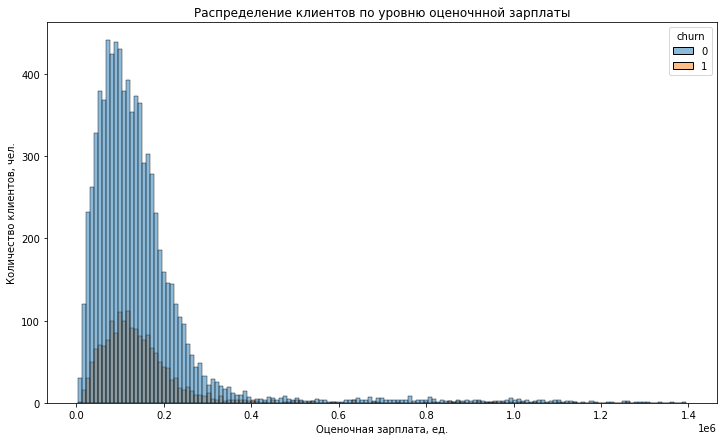

In [53]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='est_salary', hue='churn')
plt.title('Распределение клиентов по уровню оценочнной зарплаты')
plt.xlabel('Оценочная зарплата, ед.')
plt.ylabel('Количество клиентов, чел.')
plt.show()

In [54]:
#Разделим данные по оттоку
df_churn = df.query('churn == 1')['est_salary']
df_not_churn = df.query('churn == 0')['est_salary']
#Посмоторим на показатели по выборкам.
print(df_churn.describe())
print('-'*80)
print(df_not_churn.describe())

count       1,818.00
mean      148,357.48
std       122,931.98
min        10,880.27
25%        83,285.66
50%       125,408.88
75%       176,017.84
max     1,263,028.49
Name: est_salary, dtype: float64
--------------------------------------------------------------------------------
count       8,104.00
mean      147,795.99
std       142,799.30
min         2,546.30
25%        73,487.07
50%       118,248.51
75%       174,106.04
max     1,395,064.45
Name: est_salary, dtype: float64


Мы видим, что показатели среднего и стандартного откленения по выборкам приблизительно равны

In [55]:
print('Дисперсия лояльных клиентов:', np.var(df_not_churn, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(df_not_churn, ddof=1)))
print('')
print('Дисперсия клиентов ушедших в отток:', np.var(df_churn, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(df_churn, ddof=1)))

Дисперсия лояльных клиентов: 20391640794.472973
Стандартное отклонение: 142799.3024999526

Дисперсия клиентов ушедших в отток: 15112272166.883385
Стандартное отклонение: 122931.98187161624


Показатели дисперсии для выборок различаются- не выболнено требование т-теста

Графики распределения скошены вправо -не выполнено требование т-теста, однако, учитывая, что выборка большая, ненормальность распределения не является критичным в данном случае, так как по центральной предельной теореме выборочные средние распределены нормально вокруг истинного среднего совокупности.

In [56]:
# применение t-теста
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05
#Выполним t-тест
results = st.ttest_ind(
    df_churn, 
    df_not_churn,
    equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8766325121997608
Не получилось отвергнуть нулевую гипотезу


Исходя из результатов t-теста у нас нет оснований отвегнуть нулевую гипотезу о том, что средний доход отточных и лояльных клиентов равен. Однако, учитывая, что требования к тесту не соблюдены, нельзя считать результат надежным.

**Проверим гипотезы непарметрическим тестом с помощью критерия Манна-Уитни.**

In [57]:
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05  
#Выполним тест Манна-Уитни
results = st.mannwhitneyu(df_churn,df_not_churn)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: ЕСТЬ статистически значимое различие в доходах ')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу:  НЕТ статистически значимого различия в доходах '
    ) 

p-значение:  0.0002061360185759959
Отвергаем нулевую гипотезу: ЕСТЬ статистически значимое различие в доходах 


В этом случае у нас соблюдены требования к непараметрическому тесту с помощью критерия Манна-Уитни, а именно: анализируемая переменная является непрерывной, все наблюдения обеих групп независимы друг от друга,формы распределений для двух групп примерно одинаковы.
В связи с этим надежность результатов второго теста выше, чем результаты t-теста, где требования не соблюдены. Поэтому отдаем считаем, что в доходах групп есть статистически значимое различие.

<a id='18-bullet'></a>
## Гипотеза о влиянии количества продуктов 

Сформулируем вторую гипотезу.

H0:Среднее количество продуктов в группах с оттоком и без одинаковое

H1: Среднее количество продуктов в группах с оттоком и без различается

α=5% критический уровень статистической значимости.

In [58]:
# посмотрим распределение  отточных и лояльных клиентов по количеству используемых продуктов
param=df.groupby(['products','churn'])['user_id'].count().reset_index()
all_gender=df.groupby('products')['user_id'].count()
param=param.merge(all_gender,on='products')
param.columns = ['products', 'churn','column_churn','count']
display(param)
fig = px.bar(param,
             x= 'products',
             y='column_churn',
             text='column_churn',
             color='churn',color_discrete_sequence=["green", "brown"],
                )
fig.update_layout(title= f'Распределение клиентов по количеству используемых продуктов',
                  xaxis_title='Количество используемых продуктов, шт.',
                  yaxis_title='Количество клиентов, чел.')
fig.show()

products  churn  column_churn  count
0         1      0          3071   3306
1         1      1           235   3306
2         2      0          4117   5095
3         2      1           978   5095
4         3      0           731   1028
5         3      1           297   1028
6         4      0           174    474
7         4      1           300    474
8         5      0            11     19
9         5      1             8     19

In [59]:
#Создадим две выборки - те, кто является клиентом банка, и те, кто покинул.
product_churn = df.query('churn == 1')['products']
product_not_churn = df.query('churn == 0')['products']
#Посмоторим на показатели по выборкам.
print(product_churn.describe())
print('-'*80)
print(product_not_churn.describe())

count   1,818.00
mean        2.38
std         0.92
min         1.00
25%         2.00
50%         2.00
75%         3.00
max         5.00
Name: products, dtype: float64
--------------------------------------------------------------------------------
count   8,104.00
mean        1.76
std         0.71
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         5.00
Name: products, dtype: float64


Мы видим, что показатели среднего по выборкам одинаковы, а стандартные отклонения различаются.
Также проверим показатели дисперсии.

In [60]:
print('Дисперсия лояльных клиентов:', np.var(product_churn, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(product_churn, ddof=1)))
print('')
print('Дисперсия отточных клиентов:', np.var(product_not_churn, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(product_not_churn, ddof=1)))

Дисперсия лояльных клиентов: 0.8503832221416968
стандартное отклонение: 0.9221622536960059

Дисперсия отточных клиентов: 0.508878943108953
стандартное отклонение: 0.7133575142303843


Показатели дисперсии выборок имеют значительные различия.

Проверим гипотезу будем c помощью t-критерия Стьюдента. Применять будем метод ttest_ind библиотеки scipy для сравнения средних двух независимых выборок с различной дисперсией.

In [61]:
alpha = 0.05
results_prod = st.ttest_ind(product_churn, product_not_churn, equal_var=False)
print('p-значение:', results_prod.pvalue)

if results_prod.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.186736545091533e-139
Отвергаем нулевую гипотезу


По результатам отвергаем нулевую гипотезу, а значит - статистически значимые различия в количестве используемых продуктов банка между  лояльными клиентами и отточными клиентами есть.

In [62]:
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05
#Выполним тест Манна-Уитни
results_prod = st.mannwhitneyu(product_churn, product_not_churn, alternative='two-sided')
print('p-значение:', results_prod.pvalue)

if results_prod.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 6.116496159257001e-162
Отвергаем нулевую гипотезу


Непарметрическим тест с помощью критерия Манна-Уитни также подтверждает, что у нас нет оснований принять нулевую гипотезу.

<a id='19-bullet'></a>
## Гипотеза о влиянии города 

Сформулируем третью гипотезу.

H0:Среднее количество клиентов в Рыбинске, Ярославле и Ростове  в группах с оттоком и без не различается

H1: Среднее количество клиентов в Рыбинске, Ярославле и Ростове  в группах с оттоком и без  различается

α=5% критический уровень статистической значимости.

In [63]:
# посмотрим распределение  отточных и лояльных клиентов по городам
param=df.groupby(['city','churn'])['user_id'].count().reset_index()
all_gender=df.groupby('city')['user_id'].count()
param=param.merge(all_gender,on='city')
param.columns = ['city', 'churn','column_churn','count']
display(param)
fig = px.bar(param,
             x= 'city',
             y='column_churn',
             text='column_churn',
             color='churn',color_discrete_sequence=["green", "brown"],
                )
fig.update_layout(title= f'Распределение клиентов по городам',
                  xaxis_title='Города',
                  yaxis_title='Количество клиентов, чел.')
fig.show()

city  churn  column_churn  count
0     Ростов      0          1151   1416
1     Ростов      1           265   1416
2    Рыбинск      0          2216   2652
3    Рыбинск      1           436   2652
4  Ярославль      0          4737   5854
5  Ярославль      1          1117   5854

In [64]:
test_results=list()  #cоздаем список для результатом
alpha = 0.05  # критический уровень статистической значимости

churn = np.array([243, 380]) # Данные Ростова и Рыбинска
citizens = np.array([1362, 2456])

# пропорция успехов в первой группе:
p1=churn[0]/citizens[0]

# пропорция успехов во второй группе:
p2 = churn[1]/citizens[1]


# пропорция успехов в комбинированном датасете:
p_combined = (churn[0] + churn[1]) / (citizens[0] + citizens[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/churn[0] + 1/churn[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

# добавляем p-значение в список результатов тестов
test_results.append(p_value)

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.435078318772951
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [65]:
alpha = 0.05  # критический уровень статистической значимости

churn = np.array([242, 925]) # Данные Ростова и Ярославля
citizens = np.array([1362, 5232])

# пропорция успехов в первой группе:
p1=churn[0]/citizens[0]

# пропорция успехов во второй группе:
p2 = churn[1]/citizens[1]


# пропорция успехов в комбинированном датасете:
p_combined = (churn[0] + churn[1]) / (citizens[0] + citizens[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/churn[0] + 1/churn[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

# добавляем p-значение в список результатов тестов
test_results.append(p_value)

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.974430376946239
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [66]:
alpha = 0.05  # критический уровень статистической значимости

churn = np.array([380, 925]) # Данные Рыбинска и Ярославля
citizens = np.array([2456, 5232])

# пропорция успехов в первой группе:
p1=churn[0]/citizens[0]

# пропорция успехов во второй группе:
p2 = churn[1]/citizens[1]


# пропорция успехов в комбинированном датасете:
p_combined = (churn[0] + churn[1]) / (citizens[0] + citizens[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/churn[0] + 1/churn[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

# добавляем p-значение в список результатов тестов
test_results.append(p_value)

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.33454796025242284
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Как показал Z-тест нет основания полагать, что город влияет на уровень оттока клиентов

В ходе тестирования были проведены 3 эксперимента:
Сравнение данных Ростова и Рыбинска / уровень статистической значимости - 5%
Сравнение данных Ростова и Ярославля / уровень статистической значимости - 5%
Сравнение данных Рыбинска и Ярославля / уровень статистической значимости - 5%

Для проверки статистических гипотез  критический уровень значимости был взят 0.05. Проводился множественный тест, т.е. брали несколько выборок из одного и того же набора данных. Особенность такого теста в том, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода (отвергнуть нулевую гипотезу).
При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. При уровне 0.05- каждый двадцатый раз.

Определим, какой уровень значимости стоит применить. Выберем метод Шидака, т.к. он наиболее точен. Рассчитаем уточненный критический уровень значимости.

In [67]:
a = 1 - (1 - 0.05)**(1 / 3)
print('Уточненый а:', a)

Уточненый а: 0.016952427508441503


Используя метод Шидака, критический уровень значимости а следовало бы уменьшить до 0,017

In [68]:
# Все результаты тестов были записаны в список
test_results

[0.435078318772951, 0.974430376946239, 0.33454796025242284]

In [69]:
#Среди результатов найдем минимальное значение и сравним его с уточненным а.
min_number=min(test_results)

if min_number < a:
        print(f'Минимальное значение полученных результатов тестов = {min_number}\
        меньше уточненного а= {a}, требуется пересмотр тестов')
else:
        print(f'Минимальное значение полученных результатов тестов ={min_number} больше\
        уточненного а={a}, не требуется пересмотр тестов')


Минимальное значение полученных результатов тестов =0.33454796025242284 больше        уточненного а=0.016952427508441503, не требуется пересмотр тестов


Для всех  пар городов  p-value значительно больше 0.05 - минимальное значение 0,33.Следовательно, нулевую гипотезу не удалось отвергнуть, и нет оснований полагать, что город влияет на отточность клиентов.

<a id='20-bullet'></a>
## Вывод по разделу 4

В данном разделе были рассмотрены 3 гипотезы о влиянии разных факторов на отточность клиентов:
- Средний доход отточных и лояльных клиентов различается(отвергаем гипотезу)
- Среднее количество продуктов в группах с оттоком и без одинаковое (отвергаем нулевую гипотезу - статистически значимые различия в количестве используемых продуктов банка между лояльными клиентами и отточными клиентами есть)
- Среднее количество клиентов в Рыбинске, Ярославле и Ростове в группах с оттоком и без одинаковое (не удалось отвергнуть гипотезу)

<a id='21-bullet'></a>
## Промежуточный вывод

Определим, какие показатели стратегически вляют на отток, какие значения и интервалы этих показателей связаны с отсутвием оттока:
- 

Больше всего на отток влияет :

- собственные средства клиентов (баланс ) у отточных клиентов на 112.49 % выше, чем у лояльных
- количество баллов собственности у отточных клиентов на 58.07% выше, чем у лояльных
- отточные клиенты на 45.36% более активные пользователи, чем лояльные
- отточные клиенты на 39.25% чаще бывают мужчинами, чем лояльные
- количество продуктов, которыми пользуются  отточные клиенты на 35.21 % выше, чем у лояльных
- отточных клиентов на 2.63% больше в Ростове и на 5.11% больше в Ярославле
- кредитный рейтинг у отточных клиентов на 2,12% выше, чем у лояльных

Больше всего на лояльность влияют:
- принадлежность к женскому полу(на 52,51% женщин лояльных больше, чем отточных)
- наличие кредитной карты- у лояльных клиентов значение на 28.49% выше, чем у отточных клиентов


Наиболее сильная связь у оттока с отсутствием баланса (38%),имущественной оценкой (35%),активностью (26%), количеством продуктов  и кредитным рейтингом (23%), принадлежностью к полу (22%), наличие кредитной карты (20%), возраст (18%)

**Значения и интервалы в разрезе отточных и неотточных клиентов представлены ниже:**

Отточные:
- пол-Мужской
- баланс более 775 000 руб.
- баллы собственности- 5-9
- активность в приложении
- количество продуктов 3-5
- кредитный рейтинг 863-866 
- возраст от 22 до 34 лет и от 49 до 60 лет
- доход более 85 т.р.
- без кредитки

Лояльные:
- пол-Женский
- баланс до 775 000 руб.
- баллы собственности- 0-4
- не сильно активные
- количество продуктов 1-2
- кредитный рейтинг  до 815; 938 и более
- возраст от 18 до 21,от  35 лет до 49  и  с 61 до 86 лет - 
- доход  до 85 т.р.
- кредитная карта
- нулевой баланс

<a id='22-bullet'></a>
# Метрика

При составлении бизнес-метрики будем учитывать следующие характеристики:
- заработная плата
- баланс на счете
- наличие кредитной карты
- количество продуктов
    
Бизнес - метрика будет добавлена в отдельный столбец, согласно категоризации данных, которую проведем ниже.


user_id  score       city gender   age  equity      balance  products  \
0   183012 850.00    Рыбинск      Ж 25.00       1    59,214.82         2   
1   146556 861.00    Рыбинск      Ж 37.00       5   850,594.33         3   
2   120722 892.00    Рыбинск      Ж 30.00       0         0.00         1   
3   225363 866.00  Ярославль      Ж 51.00       5 1,524,746.26         2   
4   157978 730.00  Ярославль      М 34.00       5       174.00         1   

   credit_card  last_activity  est_salary  churn  yaroslavl  rybinsk  rostov  \
0            0              1   75,719.14      1          0        1       0   
1            1              0   86,621.77      0          0        1       0   
2            1              1  107,683.34      0          0        1       0   
3            0              1  174,423.53      1          1        0       0   
4            1              0   67,353.16      1          1        0       0   

   М  Ж  nobalance bal_m  
0  0  1          0     1  
1  0  1          0     4  
2  0  1          1     1  
3  0  1          0     5  
4  1  0          0     1

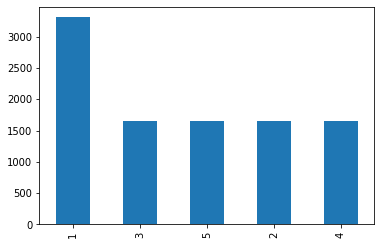

1    3308
3    1654
5    1654
2    1653
4    1653
Name: balance, dtype: int64

In [70]:
# категоризация баланса
df['bal_m'] = pd.qcut(df.balance, q=6,
                        labels=['1',
                                 '2',
                                '3',
                                '4',
                                '5'],duplicates='drop')
display(df.head())
 
df['bal_m'].value_counts().plot(kind='bar')
plt.show()
 
qcut_series, qcut_intervals = pd.qcut(df.balance, q=6,
                                      labels=['1',
                                              '2',
                                              '3',
                                              '4',
                                             '5'],
                                      retbins=True,
                                      duplicates='drop')
 
qcut_series.value_counts()

user_id  score       city gender   age  equity      balance  products  \
0   183012 850.00    Рыбинск      Ж 25.00       1    59,214.82         2   
1   146556 861.00    Рыбинск      Ж 37.00       5   850,594.33         3   
2   120722 892.00    Рыбинск      Ж 30.00       0         0.00         1   
3   225363 866.00  Ярославль      Ж 51.00       5 1,524,746.26         2   
4   157978 730.00  Ярославль      М 34.00       5       174.00         1   

   credit_card  last_activity  est_salary  churn  yaroslavl  rybinsk  rostov  \
0            0              1   75,719.14      1          0        1       0   
1            1              0   86,621.77      0          0        1       0   
2            1              1  107,683.34      0          0        1       0   
3            0              1  174,423.53      1          1        0       0   
4            1              0   67,353.16      1          1        0       0   

   М  Ж  nobalance bal_m sal_m  
0  0  1          0     1     2  
1  0  1          0     4     2  
2  0  1          1     1     3  
3  0  1          0     5     4  
4  1  0          0     1     2

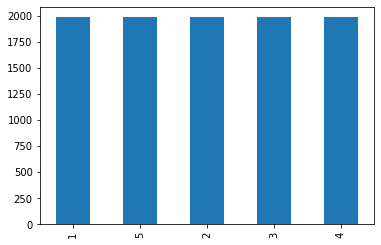

1    1985
5    1985
2    1984
3    1984
4    1984
Name: est_salary, dtype: int64

In [71]:
# категоризация заработной платы
df['sal_m'] = pd.qcut(df.est_salary, q=5,
                        labels=['1',
                                 '2',
                                '3',
                                '4',
                                '5'],duplicates='drop')
display(df.head())
 
df['sal_m'].value_counts().plot(kind='bar')
plt.show()
 
qcut_series, qcut_intervals = pd.qcut(df.est_salary, q=5,
                                      labels=['1',
                                              '2',
                                              '3',
                                              '4',
                                             '5'],
                                      retbins=True,
                                      duplicates='drop')
 
qcut_series.value_counts()

Теперь рассчитаем метрику: сначала оговоримся, что из 4 параметров для банка не все одинаково важны, так наличие доходов у человека- один из главных показателей, далее банку интересно6 чтобы человек был не просто платежеспособным, а нес деньги в банк- либо на счет, либо через кредитный продукт, и на третьем месте уже будет количество продуктов, которое он оформит, в связи с этим дадим каждому из показателей удельный вес в окончательной метрике:
- заработная плата=1
- баланс на счете=1
- наличие кредитной карты=1
- количество продуктов, которыми пользуется клиент   (делим на количество продуктов банка) 

In [72]:
#Показатель бизнес-метрики, считаем баллы по столбцам категоризации баланаса,
#зп, кол-ва продуктов и наличие кредитки

df['bal_m']=df['bal_m'].astype('int64')
df['sal_m']=df['bal_m'].astype('int64')
df['metr']=df['products']/5+df['credit_card']+df['bal_m']+df['sal_m']
df.head()


user_id  score       city gender   age  equity      balance  products  \
0   183012 850.00    Рыбинск      Ж 25.00       1    59,214.82         2   
1   146556 861.00    Рыбинск      Ж 37.00       5   850,594.33         3   
2   120722 892.00    Рыбинск      Ж 30.00       0         0.00         1   
3   225363 866.00  Ярославль      Ж 51.00       5 1,524,746.26         2   
4   157978 730.00  Ярославль      М 34.00       5       174.00         1   

   credit_card  last_activity  est_salary  churn  yaroslavl  rybinsk  rostov  \
0            0              1   75,719.14      1          0        1       0   
1            1              0   86,621.77      0          0        1       0   
2            1              1  107,683.34      0          0        1       0   
3            0              1  174,423.53      1          1        0       0   
4            1              0   67,353.16      1          1        0       0   

   М  Ж  nobalance  bal_m  sal_m  metr  
0  0  1          0      1      1  2.40  
1  0  1          0      4      4  9.60  
2  0  1          1      1      1  3.20  
3  0  1          0      5      5 10.40  
4  1  0          0      1      1  3.20

In [73]:
# категоризация метрики привлекательности клиента для банка
df['m_value'] = pd.qcut(df.metr, q=3,
                        labels=['низкая',
                                 'средняя',
                                'высокая'],duplicates='drop')
display(df.head())
 

user_id  score       city gender   age  equity      balance  products  \
0   183012 850.00    Рыбинск      Ж 25.00       1    59,214.82         2   
1   146556 861.00    Рыбинск      Ж 37.00       5   850,594.33         3   
2   120722 892.00    Рыбинск      Ж 30.00       0         0.00         1   
3   225363 866.00  Ярославль      Ж 51.00       5 1,524,746.26         2   
4   157978 730.00  Ярославль      М 34.00       5       174.00         1   

   credit_card  last_activity  est_salary  churn  yaroslavl  rybinsk  rostov  \
0            0              1   75,719.14      1          0        1       0   
1            1              0   86,621.77      0          0        1       0   
2            1              1  107,683.34      0          0        1       0   
3            0              1  174,423.53      1          1        0       0   
4            1              0   67,353.16      1          1        0       0   

   М  Ж  nobalance  bal_m  sal_m  metr  m_value  
0  0  1          0      1      1  2.40   низкая  
1  0  1          0      4      4  9.60  высокая  
2  0  1          1      1      1  3.20   низкая  
3  0  1          0      5      5 10.40  высокая  
4  1  0          0      1      1  3.20   низкая

<a id='23-bullet'></a>
# Сегментация:
На основании стратегических поакзателей, выявим несколько приоритетных сегментов. Для каждого сегмента важны три характеристики – размер сегмента, уровень оттока, ценность клиентов. Под потенциальной ценностью клиента будем считать данные по столбцу est_salary. так как наша задача выявить наиболее лояльные сегменты, то будем рассматривать параметры, которые больше важны для лояльных клиентов.

Добавим столбцы, кодирующие кредитный рейтинг,баланс,возраст, доход в соответсвии с диапазонами , характерными для более лояльных клиентов

In [74]:
#Функция разбивки на возрастные группы
def age_group(age):
    '''оператором сравнения будем проверять значения и выделять каждое в отдельную группу'''
    if 18<age<=21:
        return '18-21'
    if 21<age<35:
        return '21-35'
    if 35<=age<=49:
        return '35-49'
    if 49<age<61:
        return '49-61'
    if age>=61:
        return '>61'

#применим функцию к датафрейму
df['age_group'] = df['age'].apply(age_group)

In [75]:
#Функция разбивки по доходу
def salary_group(salary):
    '''оператором сравнения будем проверять значения и выделять каждое в отдельную группу'''
    if salary<=85000:
        return '<85 т.р.'
    else:
        return '> 85 т.р.'

#применим функцию к датафрейму
df['salary_group'] = df['est_salary'].apply(salary_group)

In [76]:
#Функция разбивки по кредитному рейтингу
def score_group(score):
    '''оператором сравнения будем проверять значения и выделять каждое в отдельную группу'''
    if score<815:
        return '<815'
    if 815<=score<938:
        return '815-938'
    if score>=938:
        return '>938'

#применим функцию к датафрейму
df['score_group'] = df['score'].apply(score_group)

In [77]:
#Функция разбивки по уровню дохода
def balance_group(balance):
    '''оператором сравнения будем проверять значения и выделять каждое в отдельную группу'''
    if balance<=775000:
        return '<775 т.р.'
    if balance>700000:
        return '>775 т.р.'

#применим функцию к датафрейму
df['balance_group'] = df['balance'].apply(balance_group)

In [78]:
df.head()

user_id  score       city gender   age  equity      balance  products  \
0   183012 850.00    Рыбинск      Ж 25.00       1    59,214.82         2   
1   146556 861.00    Рыбинск      Ж 37.00       5   850,594.33         3   
2   120722 892.00    Рыбинск      Ж 30.00       0         0.00         1   
3   225363 866.00  Ярославль      Ж 51.00       5 1,524,746.26         2   
4   157978 730.00  Ярославль      М 34.00       5       174.00         1   

   credit_card  last_activity  est_salary  churn  yaroslavl  rybinsk  rostov  \
0            0              1   75,719.14      1          0        1       0   
1            1              0   86,621.77      0          0        1       0   
2            1              1  107,683.34      0          0        1       0   
3            0              1  174,423.53      1          1        0       0   
4            1              0   67,353.16      1          1        0       0   

   М  Ж  nobalance  bal_m  sal_m  metr  m_value age_group salary_group  \
0  0  1          0      1      1  2.40   низкая     21-35     <85 т.р.   
1  0  1          0      4      4  9.60  высокая     35-49    > 85 т.р.   
2  0  1          1      1      1  3.20   низкая     21-35    > 85 т.р.   
3  0  1          0      5      5 10.40  высокая     49-61    > 85 т.р.   
4  1  0          0      1      1  3.20   низкая     21-35     <85 т.р.   

  score_group balance_group  
0     815-938     <775 т.р.  
1     815-938     >775 т.р.  
2     815-938     <775 т.р.  
3     815-938     >775 т.р.  
4        <815     <775 т.р.

Выделим несколько сегментов клиентов на основе ранее проведенного анализа:
- женщины, с кредитной картой и неактивные в последний месяц
- клиенты с 0 балансом, в возрасте 35-49, с 2 продуктами, один из которых кредитка
- клиент из Рыбинска, неактивный в последнее время
- женщина в возрасте 35-49 лет с 2 продуктами
- женщины 35-49 со скорингом выше 938
- клиент c кредиткой со скорингом выше 938

In [79]:
# подгтовим список полученных срезов для функции
values=[] 

#сделаем срез по "0 баланс,возраст 35-49, 2 продукта, кредитка"
nobal=df.query('balance==0 and age_group =="35-49"  and products<=2 and credit_card==1')               
values.append(nobal)  

#сделаем срез по "женщины, с кредитной картой и неактивные в последний месяц"
q=df.query('gender=="Ж" and last_activity==0 and credit_card==1')               
values.append(q)

#сделаем срез по "клиент из Рыбинска, неактивный в последнее время"
r=df.query('city=="Рыбинск" and last_activity==0')               
values.append(r)

#сделаем срез по "женщина в возрасте 35-49 лет с 2 продуктами"
t=df.query('gender=="Ж" and products<=2 and age_group =="35-49"')               
values.append(t)

#сделаем срез по "клиенты из Ярославля с кредиткой и доходом более 85000  "
y=df.query('city=="Ярославль" and est_salary>=85000 and credit_card==1')               
values.append(y) 

#сделаем срез по " 35-49 лет со скорингом выше 938"
i=df.query('age_group =="35-49" and score >=938')               
values.append(i)

#сделаем срез по "клиент c кредиткой со скорингом выше 938"
n=df.query(' credit_card==1 and score >=938')               
values.append(n)


Напишем функцию для расчета % лояльных клиентов и размер сегмента

In [80]:
title_list=["0 баланс,возраст 35-49, 2 продукта, кредитка",\
            "женщины, с кредитной картой и неактивные в последний месяц",\
            "клиент из Рыбинска, неактивный в последнее время",\
            "женщина в возрасте 35-49 лет с 2 продуктами",\
            "клиенты из Ярославля с кредиткой и доходом более 85000  ",\
            "35-49 лет со скорингом выше 938",\
            "клиент c кредиткой со скорингом выше 938"]
segment=pd.DataFrame()
segment['name']=title_list
segment['size']=0
segment['churn']=0.0
segment['score']=0.0
for i,value in enumerate(values):
    segment['size'][i]=value.shape[0]
    segment['churn'][i]= value.query('churn==1')['user_id'].count()/value['user_id'].count()*10
    segment['score'][i]=value['metr'].mean()
display(segment.sort_values(by='score',ascending=False))

name  size  churn  \
1  женщины, с кредитной картой и неактивные в последний месяц  1474   0.55   
5                             35-49 лет со скорингом выше 938   303   1.16   
3                 женщина в возрасте 35-49 лет с 2 продуктами  1666   0.69   
2            клиент из Рыбинска, неактивный в последнее время  1155   0.97   
4    клиенты из Ярославля с кредиткой и доходом более 85000    3058   1.54   
6                    клиент c кредиткой со скорингом выше 938   481   1.04   
0                0 баланс,возраст 35-49, 2 продукта, кредитка   831   0.06   

   score  
1   6.35  
5   6.27  
3   6.22  
2   6.22  
4   6.15  
6   6.03  
0   3.23

 Таким образом, все группы более 300-3000 человек , у всех групп процент оттока минимальный и примерно одинаковый рейтинг, лидерами являются :
 1)женщины, с кредитной картой и неактивные в последний месяц
 2) клиенты 35-49 лет со скорингом выше 938
 3) женщина в возрасте 35-49 лет с 2 продуктами

<a id='23-bullet'></a>
# Вывод и рекомендации:

В ходе исследования отточных и лояльных клиентов банка были составлены портреты клиентов:
**Отточные:**
•	пол-Мужской
•	баланс более 775 000 руб.
•	баллы собственности- 5-9
•	активность в приложении
•	количество продуктов 3-5
•	кредитный рейтинг 815-938
•	возраст от 22 до 34 лет и от 49 до 60 лет
•	доход более 85 т.р.
•	без кредитки

**Лояльные:**
•	пол-Женский
•	баланс до 775 000 руб.
•	баллы собственности- 0-4
•	не сильно активные
•	количество продуктов 1-2
•	кредитный рейтинг до 815; 938 и более
•	возраст от 18 до 21,от 35 лет до 49 и с 61 до 86 лет - 
•	доход до 85 т.р.
•	кредитная карта
•	нулевой баланс



Больше всего на отток влияет :

- собственные средства клиентов (баланс ) у отточных клиентов на 112.49 % выше, чем у лояльных
- количество баллов собственности у отточных клиентов на 58.07% выше, чем у лояльных
- отточные клиенты на 45.36% более активные пользователи, чем лояльные
- отточные клиенты на 39.25% чаще бывают мужчинами, чем лояльные
- количество продуктов, которыми пользуются  отточные клиенты на 35.21 % выше, чем у лояльных
- отточных клиентов на 2.63% больше в Ростове и на 5.11% больше в Ярославле
- кредитный рейтинг у отточных клиентов на 2,12% выше, чем у лояльных

Больше всего на лояльность влияют:
- принадлежность к женскому полу(на 52,51% женщин лояльных больше, чем отточных)
- наличие кредитной карты- у лояльных клиентов значение на 28.49% выше, чем у отточных клиентов


Наиболее сильная связь у оттока с отсутствием баланса (38%),имущественной оценкой (35%),активностью (26%), количеством продуктов  и кредитным рейтингом (23%), принадлежностью к полу (22%), наличие кредитной карты (20%), возраст (18%)


In [100]:
segment.sort_values(by='score',ascending=False).head(3)

name  size  churn  \
1  женщины, с кредитной картой и неактивные в последний месяц  1474   0.55   
5                             35-49 лет со скорингом выше 938   303   1.16   
3                 женщина в возрасте 35-49 лет с 2 продуктами  1666   0.69   

   score  
1   6.35  
5   6.27  
3   6.22

Рекомендации по продукатам для данных сегментов:
- так как целевая возростная категория женщины среднего возраста 35-49 лет- у них вероятно есть дети,отличным предложением в таком случае будет выпуск дополнительной  детской дебетовой карты, привязанной к родительскому счету с возможностью в личном кабинете отслеживать траты ребенка в школе/институте. Это важно например, в разрезе отслеживания правильного питания. Устновака приложения должна быть простой и понятной, буквально в одно касание по  qr коду или иным способом. Мониторинг расходов ребенка в личном кабинете мамы будет поддерживать лояльность клиента и убережет от оттока;
- так как один из главных параметров, влияющих на лояльность- наличие кредитной карты- необходимо , чтобы пользование кредиткой было максимально удобным и бесплатным, так как на рынке сечас очень много банков предалагают приятные процентные ставки, с крупными банками в таком разрезе конкурировать тяжело, так как их обороты намного выше, поэтому привлекательность должна заключаться в другом. Например, бесплатное использование кредитной карты при определенном обороте в месяц;
- для клиентов уже имеющеся кредиткой бесплатное обслуживание при оформлении второго продукта, например детской карты из первого пунтка или наоборот, если есть родительская карта- кредитка с бесплатным обслуживанием.
- отличным продуктом сейчас станет - оформление ЭДО (электронного документооборота), так как женщины зачастую сидят дома с детьми во время болезни и могут быть самозанятыми или работать на удаленке в сфере последних социо-политических событий, вопрос об обмене документами остается для многих открытым. Решает это ЭДО в личном электронном кабинете с небольшой абонентской платой, а если у клиента оформлен продукт банка- то скидка или несколько месяцев бесплатного обслуживания.
- идельным кредитным продуктом станет карта- рефинансирование всех имеющихся рассрочек (по типу Халва), когда все траты собраны в одном месте и гасятся одним платежом. Акцентом на привлечение к такому банковскому продукту станет возврат все уплаченных процентов в конце срока использования при определенном обороте на карте. Выгода банка в том, что срок кредита взять не менее 5 лет, тогда это будут среднесрочные инвестиции в банк.